# a build chain for `jupyter` auditing 

in the section below, we go from nothing to build jupyter products to accessibility tests.
we walk through these commands and their role. at the end, we explore test results as pandas dataframes.

In [2]:
    !python -m jupyter_accessibility -h

usage: builder [-h] [-i [IDS ...]] [-d [DIR ...]]

optional arguments:
  -h, --help            show this help message and exit
  -i [IDS ...], --ids [IDS ...]
                        repository ids
  -d [DIR ...], --dir [DIR ...]
                        the build directory


* build an environment for this specific jupyter product

In [5]:
    !python -m jupyter_accessibility -i jupyterlab -d jupyter-a11y-test-standard -- env

.  env:conda
Solving environment: ...working... done

## Package Plan ##

  environment location: /home/tbone/Documents/accessibility/docs/dev/jupyter-a11y-test-standard/.env

  added / updated specs:
    - git
    - nodejs[version='>=14,<15']
    - python=3.9
    - yarn


The following NEW packages will be INSTALLED:

  _libgcc_mutex      conda-forge/linux-64::_libgcc_mutex-0.1-conda_forge
  _openmp_mutex      conda-forge/linux-64::_openmp_mutex-4.5-2_gnu
  bzip2              conda-forge/linux-64::bzip2-1.0.8-h7f98852_4
  c-ares             conda-forge/linux-64::c-ares-1.18.1-h7f98852_0
  ca-certificates    conda-forge/linux-64::ca-certificates-2022.5.18.1-ha878542_0
  curl               conda-forge/linux-64::curl-7.83.1-h7bff187_0
  expat              conda-forge/linux-64::expat-2.4.8-h27087fc_0
  gettext            conda-forge/linux-64::gettext-0.19.8.1-h73d1719_1008
  git                conda-forge/linux-64::git-2.35.3-pl5321h36853c3_0
  icu                conda-forge/linux-64::icu

* after the base environment we need to add project specific dependencies using the `setup` task

In [6]:
    !python -m jupyter_accessibility -i jupyterlab -d jupyter-a11y-test-standard -- setup

.  setup:pip:jupyterlab
  Using cached jupyterlab-3.4.2-py3-none-any.whl (8.8 MB)
  Using cached jupyter_server-1.17.0-py3-none-any.whl (342 kB)
  Using cached tornado-6.1-cp39-cp39-manylinux2010_x86_64.whl (427 kB)
  Using cached jupyterlab_server-2.14.0-py3-none-any.whl (54 kB)
  Using cached ipython-8.3.0-py3-none-any.whl (750 kB)
  Using cached nbclassic-0.3.7-py3-none-any.whl (13 kB)
  Using cached Jinja2-3.1.2-py3-none-any.whl (133 kB)
  Using cached jupyter_core-4.10.0-py3-none-any.whl (87 kB)
  Using cached packaging-21.3-py3-none-any.whl (40 kB)
  Using cached MarkupSafe-2.1.1-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (25 kB)
  Using cached anyio-3.6.1-py3-none-any.whl (80 kB)
  Using cached argon2_cffi-21.3.0-py3-none-any.whl (14 kB)
  Using cached terminado-0.15.0-py3-none-any.whl (16 kB)
  Using cached jupyter_client-7.3.1-py3-none-any.whl (130 kB)
  Using cached Send2Trash-1.8.0-py3-none-any.whl (18 kB)
  Using cached nbconvert-6.5.0-py3-none-any.whl (561 kB

* the `test_setup` task adds dependencies to test the jupyter assets. it does not test anything.

In [7]:
    !python -m jupyter_accessibility -i jupyterlab -d jupyter-a11y-test-standard -- test_setup

.  test_setup:copy-templates
.  test_setup:pip
  Using cached matplotlib-3.5.2-cp39-cp39-manylinux_2_5_x86_64.manylinux1_x86_64.whl (11.2 MB)
  Using cached ipywidgets-7.7.0-py2.py3-none-any.whl (123 kB)
  Using cached numpy-1.22.4-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.8 MB)
  Using cached scipy-1.8.1-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (42.2 MB)
  Using cached jupyter-1.0.0-py2.py3-none-any.whl (2.7 kB)
  Using cached Pillow-9.1.1-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.1 MB)
  Using cached fonttools-4.33.3-py3-none-any.whl (930 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached kiwisolver-1.4.2-cp39-cp39-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (1.6 MB)
  Using cached widgetsnbextension-3.6.0-py2.py3-none-any.whl (1.6 MB)
  Using cached jupyterlab_widgets-1.1.0-py3-none-any.whl (245 kB)
  Using cached jupyter_console-6.4.3-py3-none-any.whl (22 kB)
  Using cached qtconsole-5.3.0-py3-none-any.w

* actually test the build resources.

In [10]:
    !python -m jupyter_accessibility -i jupyterlab -d jupyter-a11y-test-standard -- test

.  test:playwright
the target is /home/tbone/Documents/accessibility/docs/dev/jupyter-a11y-test-standard/jupyter-axe

Running 2 tests using 1 worker

[WebServer] [I 2022-05-24 10:43:00.592 ServerApp] jupyterlab | extension was successfully linked.

[WebServer] [I 2022-05-24 10:43:00.598 ServerApp] nbclassic | extension was successfully linked.

[WebServer] [I 2022-05-24 10:43:00.746 ServerApp] notebook_shim | extension was successfully linked.

[WebServer] [W 2022-05-24 10:43:00.760 ServerApp] All authentication is disabled.  Anyone who can connect to this server will be able to run code.


[WebServer] [I 2022-05-24 10:43:00.761 ServerApp] notebook_shim | extension was successfully loaded.
[WebServer] [I 2022-05-24 10:43:00.761 LabApp] JupyterLab extension loaded from /home/tbone/Documents/accessibility/docs/dev/jupyter-a11y-test-standard/.env/lib/python3.9/site-packages/jupyterlab
[I 2022-05-24 10:43:00.761 LabApp] JupyterLab application directory is /home/tbone/Documents/accessibilit

### axe tests results in pandas

after running the commands to run the jupyter tests, we can use the `jupyter_accessibility` module to explore the results in pandas.

In [16]:
    from jupyter_accessibility import Main
    from pathlib import Path

In [17]:
    main = Main(dir=Path("jupyter-a11y-test-standard"),ids=["jupyterlab"])

In [18]:
main.project.axe_results()


id  \
jupyter-a11y-test-standard/jupyter-axe/test-res... 0            button-name   
                                                   1         color-contrast   
                                                   2      duplicate-id-aria   
                                                   3                  label   
                                                   4               tabindex   
jupyter-a11y-test-standard/jupyter-axe/test-res... 0  aria-progressbar-name   
                                                   1            button-name   
                                                   2         color-contrast   
                                                   3      duplicate-id-aria   
                                                   4                  label   
                                                   5               tabindex   

                                                        impact  \
jupyter-a11y-test-standard/jupyter-axe/test-res... 0  critical   
                                                   1   serious   
                                                   2  critical   
                                                   3  critical   
                                                   4   serious   
jupyter-a11y-test-standard/jupyter-axe/test-res... 0   serious   
                                                   1  critical   
                                                   2   serious   
                                                   3  critical   
                                                   4  critical   
                                                   5   serious   

                                                                                                   tags  \
jupyter-a11y-test-standard/jupyter-axe/test-res... 0  [cat.name-role-value, wcag2a, wcag412, section...   
                                                   1                      [cat.color, wcag2aa, wcag143]   
                                                   2                     [cat.parsing, wcag2a, wcag411]   
                                                   3  [cat.forms, wcag2a, wcag412, wcag131, section5...   
                                                   4                      [cat.keyboard, best-practice]   
jupyter-a11y-test-standard/jupyter-axe/test-res... 0                        [cat.aria, wcag2a, wcag111]   
                                                   1  [cat.name-role-value, wcag2a, wcag412, section...   
                                                   2                      [cat.color, wcag2aa, wcag143]   
                                                   3                     [cat.parsing, wcag2a, wcag411]   
                                                   4  [cat.forms, wcag2a, wcag412, wcag131, section5...   
                                                   5                      [cat.keyboard, best-practice]   

                                                                                            description  \
jupyter-a11y-test-standard/jupyter-axe/test-res... 0              Ensures buttons have discernible text   
                                                   1  Ensures the contrast between foreground and ba...   
                                                   2  Ensures every id attribute value used in ARIA ...   
                                                   3             Ensures every form element has a label   
                                                   4  Ensures tabindex attribute values are not grea...   
jupyter-a11y-test-standard/jupyter-axe/test-res... 0  Ensures every ARIA progressbar node has an acc...   
                                                   1              Ensures buttons have discernible text   
                                                   2  Ensures the contrast between foreground and ba...   
                                                   3  Ensures every id attribute va

## `playwright` test results

we can also dig into the playwright test outputs. currently they lack granularity, but that is an affordance we could consider later.

In [19]:
import pandas


In [20]:
results = pandas.read_json(
    main.project.test_results.parent / "main-test-results.json", typ=pandas.Series
)
results


config    {'forbidOnly': False, 'fullyParallel': False, ...
suites    [{'title': 'a11y.test.ts', 'file': 'a11y.test....
errors                                                   []
dtype: object

In [21]:
suites = pandas.DataFrame(results.suites)
suites


,title,file,line,column,specs,suites
0,a11y.test.ts,a11y.test.ts,0,0,[],"[{'title': 'accessibility checks', 'file': 'a1..."


In [22]:
checks = suites.suites.apply(pandas.Series).stack().apply(pandas.Series)
checks


,,title,file,line,column,specs
0,0,accessibility checks,a11y.test.ts,49,6,[{'title': 'notebook a11y Lorenz.ipynb execute...


In [23]:
tests = checks.specs.apply(pandas.Series).stack().apply(pandas.Series)
tests


title    ok tags  \
0 0 0  notebook a11y Lorenz.ipynb execute false  True   []   
    1   notebook a11y Lorenz.ipynb execute true  True   []   

                                                   tests          file  line  \
0 0 0  [{'timeout': 60000, 'annotations': [], 'expect...  a11y.test.ts    64   
    1  [{'timeout': 60000, 'annotations': [], 'expect...  a11y.test.ts    64   

       column  
0 0 0       7  
    1       7

In [24]:
results = tests.tests.apply(pandas.Series).stack().apply(pandas.Series)
results


timeout annotations expectedStatus projectName  \
0 0 0 0    60000          []         passed    chromium   
    1 0    60000          []         passed    chromium   

                                                   results    status  
0 0 0 0  [{'workerIndex': 0, 'status': 'passed', 'durat...  expected  
    1 0  [{'workerIndex': 0, 'status': 'passed', 'durat...  expected

In [25]:
results.results.apply(pandas.Series).stack().apply(pandas.Series)


workerIndex  status  duration stdout stderr  retry  \
0 0 0 0 0            0  passed      7740     []     []      0   
    1 0 0            0  passed     22150     []     []      0   

                                                 attachments  
0 0 0 0 0  [{'name': 'axe-results-json', 'contentType': '...  
    1 0 0  [{'name': 'axe-results-json', 'contentType': '...

## about `jupyter_accessibility` architecture

the implementation is designed as a command line interface and interface computing object. this dual purpose lets us simulate command line behaviors in interactive sessions like a `notebook`.

Format svg is not supported natively. Pyreverse will try to generate it using Graphviz...
parsing /home/tbone/Documents/accessibility/jupyter_accessibility/__init__.py...
parsing /home/tbone/Documents/accessibility/jupyter_accessibility/__main__.py...
parsing /home/tbone/Documents/accessibility/jupyter_accessibility/__init__.py...
parsing /home/tbone/Documents/accessibility/jupyter_accessibility/_version.py...
parsing /home/tbone/Documents/accessibility/jupyter_accessibility/app.py...
parsing /home/tbone/Documents/accessibility/jupyter_accessibility/dodo.py...
parsing /home/tbone/Documents/accessibility/jupyter_accessibility/project.py...
parsing /home/tbone/Documents/accessibility/jupyter_accessibility/analysis.py...


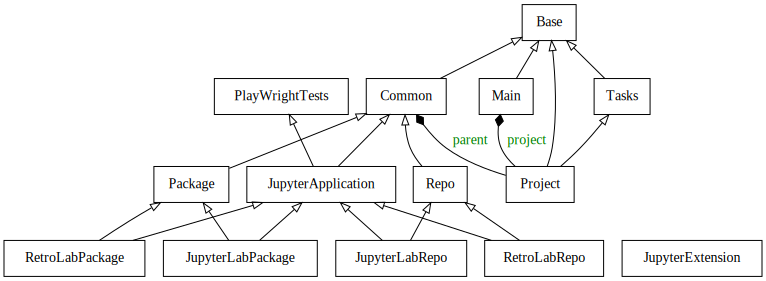

In [26]:
!pyreverse -kosvg -pjupyter_accessibility jupyter_accessibility
from IPython.display import SVG
SVG(filename="classes_jupyter_accessibility.svg")